<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/homework/HW3/Sp22HW3Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
## Homework guideline
- The deadline is Apr 5th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline 
import numpy.linalg as LA
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


<br>

---


# Q1: Numpy practice problem (10pt)
### Q1.1 Replace values between 30 and 50 in the array $Z$ by value 0

In [ ]:
Z = np.random.randint(20,60,size=10)
# insert your code here



---


### Q1.2 Compute the one-hot encodings (dummy binary variables for each unique value in the array). 
i.e., one-hot encoding for 2 in 4 dimension is $[0 ,1 , 0 ,0 ]$. 


In [ ]:
Z = np.random.randint(1,4, size=6)
# insert yout code here

<br>

---


# Q2: K-means clustering (10pt)




In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value 
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable 
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique. 




###  Alternative optimization Steps 

Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is 

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$
Please show your derivation. 


Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation. 



## **Your Answer**: 

<br>

---


# Q3: Gaussian Mixture Models (40pt)



### 1. KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$, 
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$. 

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$ 

- $\text{KL}(q||p)=0$ iff $p=q$. 

# **Your Answer:**



---


### 2. Construct a function to calculate log likelihood (10pt)
Say you have applied EM algorithm in the Gaussian Mixture model and have found the optimal parameter $\theta^*=\{\pi_c^*, \mu_c^*, \Sigma_c^*\}_{c=1}^K$. Construct a function to calculate the log likelihood $\ell(\theta)$



In [ ]:
 #@title  Q3.2 
 # your code starts here
 def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):
   return
    



---


### 3. Construct a function to calculate Bayesian information criterion (BIC) (5pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. This time we cannot simply use elbow method, instead we will use slightly more complicated criterion, Bayesian information criterion (BIC). 

The formula for BIC in Gaussian mixture models is 
$$\text{BIC}(K) = ( K-1 + Kd+Kd(d+1)/2)\log(N) -\log(\hat\ell) $$

where 
- $d$ is the dimension of observation $\mathbf{x}$, 

- $N$ is the number of observation datapoint,

- $\hat\ell$ is the maximized value of the likelihood function of the model, which is the likelihood at the optimal paramter, $\ell(\theta^*)$. 

Note models with lower BIC are generally preferred. 

Please construct a function to calculate the Bayesian information criterion. 


In [ ]:
 #@title  Q3.3 
 # your code starts here
 def BIC(K,d,N,ell_hat):
   return



---


### 4. Testing with the synthetic dataset (20pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local minimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$. 

(It is always a good habit to start your code for some special $K$, say $K=4$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

<Figure size 432x288 with 0 Axes>

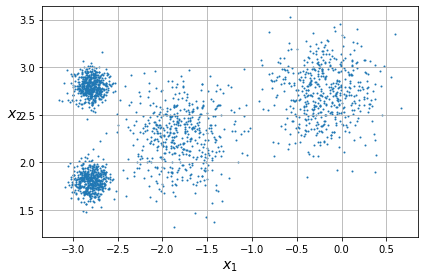

In [ ]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()  
    plt.show()     


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7) 

figure()
plot_clusters(X)       

In [ ]:
 #@title  Q3.4 
 # your code starts here

# **Your Answer:**